<a href="https://colab.research.google.com/github/amulya-vre/CODSOFT/blob/main/creditcardipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


import os
for dirname, _, filenames in os.walk('/content/creditcard.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
df=pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
df=pd.read_csv("/content/creditcard.csv")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


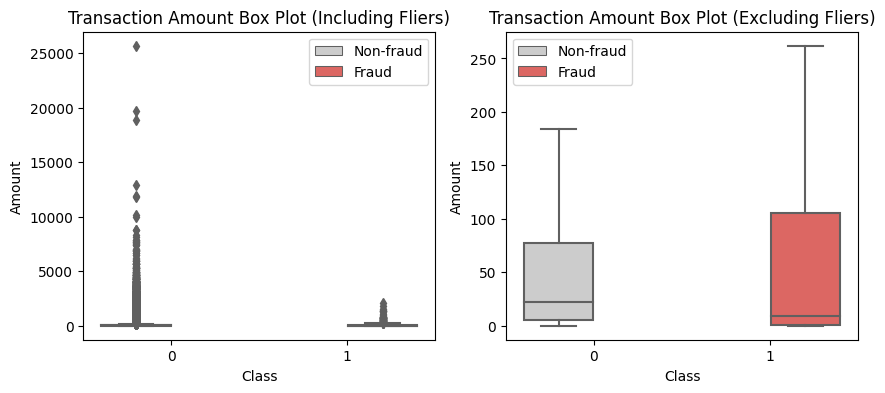

In [34]:
gray_color = "#CCCCCC"
red_color = "#F0544F"
blue_color = "#8CA6F2"
gold_color = '#F2D98C'
green_color = '#A4F28C'
white_color = '#FFFFFF'

color_pal = [gray_color, red_color]

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

sns.boxplot(data=df,
            x="Class",
            y="Amount",
            hue="Class",
            palette=color_pal,
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=df,
            x="Class",
            y="Amount",
            hue="Class",
            palette=color_pal,
            showfliers=False,
            ax=ax[1])


ax[0].set_title("Transaction Amount Box Plot (Including Fliers)")
ax[1].set_title("Transaction Amount Box Plot (Excluding Fliers)")

legend_labels = ['Non-fraud', 'Fraud']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)


plt.show()

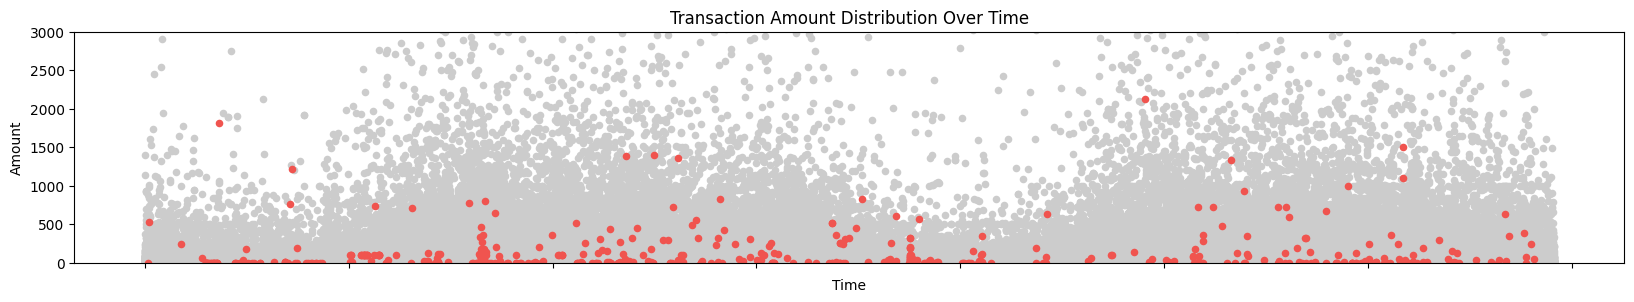

In [46]:
f, ax = plt.subplots(figsize=(20, 3))

sns.scatterplot(data=df.loc[df.Class==0],
                x='Time',
                y='Amount',
                color=gray_color,
                s=30,
                alpha=1,
                linewidth=0)

ax.set(xlabel=None, xticklabels=[])
plt.ylim(0, 3000)


sns.scatterplot(data=df.loc[df.Class==1],
                x='Time',
                y='Amount',
                color=red_color,
                s=30,
                alpha=1,
                linewidth=0)
plt.ylim(0, 3000)


ax.set_title("Transaction Amount Distribution Over Time")

plt.show()

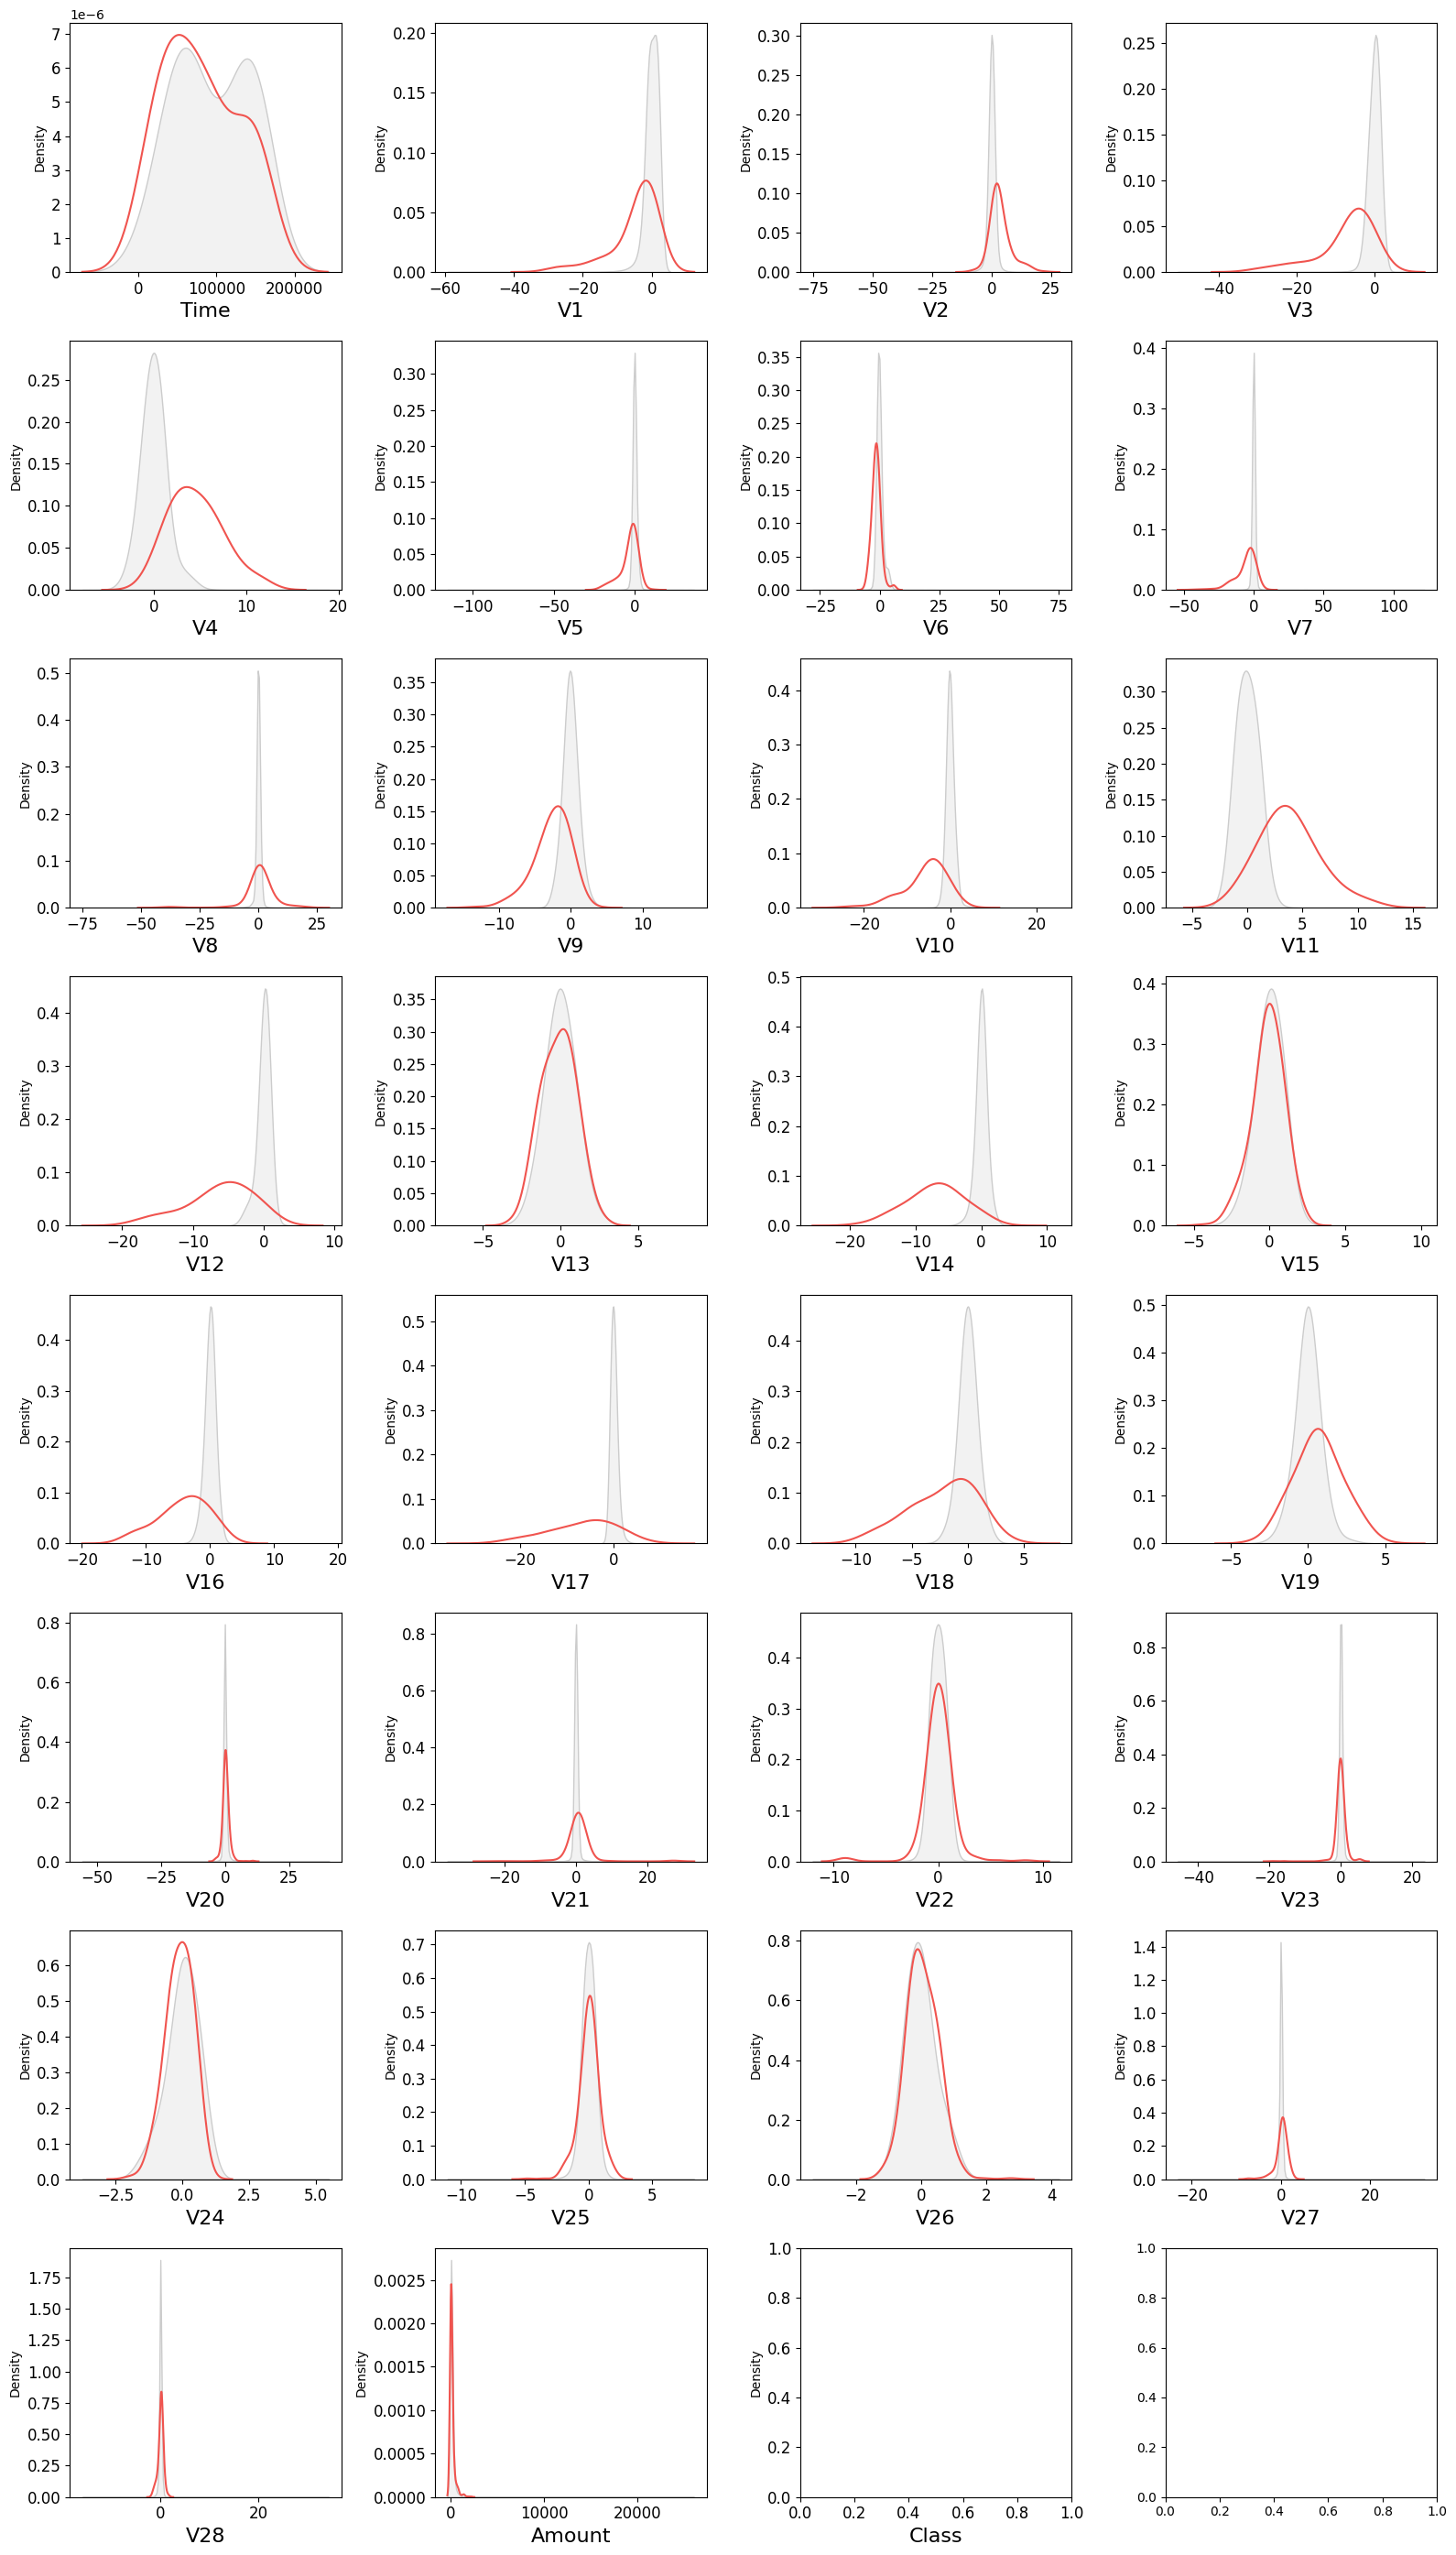

In [47]:
var = df.columns.values

t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

num_features = len(var)
num_rows = num_features // 4 + int(num_features % 4 != 0)

fig, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 28))

for idx, feature in enumerate(var):
    row = idx // 4
    col = idx % 4

    sns.kdeplot(t0[feature], bw_method=0.5, label="Class = 0", color=gray_color, fill=True, warn_singular=False, ax=ax[row, col])
    sns.kdeplot(t1[feature], bw_method=0.5, label="Class = 1", color=red_color, warn_singular=False, ax=ax[row, col])

    ax[row, col].set_xlabel(feature, fontsize=16)
    ax[row, col].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

In [38]:
pipeLog=Pipeline(
[
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),
    ('logClass',LogisticRegression())
])

In [39]:
pipeForest=Pipeline(
[
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),
    ('forestClass',RandomForestClassifier())
])

In [40]:
X=df.drop(["Class"],axis=1)
y=df["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [44]:
logScore=pipeLog.fit(X_train,y_train).score(X_test,y_test)
print("LogisticRegression Score is ",logScore)


LogisticRegression Score is  0.9991397773954567


In [43]:
forestScore=pipeForest.fit(X_train,y_train).score(X_test,y_test)
print("RandomForestClassifier Score is ",forestScore)

RandomForestClassifier Score is  0.9995962220427653
